In [1]:
# Import your Library 🥂🥂🥂 I like to import all my Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Dataset Columns
* survived: Indicates whether the passenger survived (1) or not (0). pclass: Passenger class (Ist, 2nd, 3rd).
* sex: Gender of the passenger (male or female).
* age: Age of the passenger in years.
* sibsp: Number of siblings/spouses aboard.
* parch: Number of parents/ children aboard.
* fare: Fare paid for the ticket.
* embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
* class: The ticket class (First, Second, Third).
* who: Categorization of the passenger (man, woman, child).
* adult_male: Indicates if the passenger is an adult male (True/False).
* deck: The deck the passenger was assigned to.
* embark_ town: Name of the town where the passenger embarked.
* alive: Survival status (yes/no).
* alone: Indicates whether the passenger was alone (True/False) 

# Business Questions for Analysis
1. What is the survival rate of passengers?
2. What is the gender distribution of passengers?
3. How does survival rate differ by class?
4. What is the distribution of passenger ages?
5. How many passengers embarked from each location?
6. What is the average fare paid per class?
7. How does gender affect survival rates?
8. What is the correlation between fare and survival?
9. How does the number of siblings/ spouses aboard affect survival?
10. What is the age distribution by class?
11. What is the survival rate by embarkation point?
12. What is the impact of having parents/ children aboard on survival?

In [2]:
#Import the titanic data set
df = pd.read_excel('TITANIc.xlsx')
df

,"survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone"
0,"0,3,male,22.0,1,0,7.25,S,Third,man,True,,South..."
1,"1,1,female,38.0,1,0,71.2833,C,First,woman,Fals..."
2,"1,3,female,26.0,0,0,7.925,S,Third,woman,False,..."
3,"1,1,female,35.0,1,0,53.1,S,First,woman,False,C..."
4,"0,3,male,35.0,0,0,8.05,S,Third,man,True,,South..."
...,...
886,"0,2,male,27.0,0,0,13.0,S,Second,man,True,,Sout..."
887,"1,1,female,19.0,0,0,30.0,S,First,woman,False,B..."
888,"0,3,female,,1,2,23.45,S,Third,woman,False,,Sou..."
889,"1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cher..."


In [3]:
#i observed the data set in excel came in as a csv hence we converted using the below steps used in data cleaning.

titanic = pd.read_excel('TITANIc.xlsx', header=None) #This was used to remove all the headers 
df = titanic[0].str.split(',', expand=True) #Used to expand and asign column headers
df.columns = df.iloc[0]      
df = df[1:].reset_index(drop=True)  #reset headers to it's origina names
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,,1,2,23.45,S,Third,woman,False,,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True


# EDA

In [4]:
df.info() #i observed all Dtypes came in as objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   survived     891 non-null    object
 1   pclass       891 non-null    object
 2   sex          891 non-null    object
 3   age          891 non-null    object
 4   sibsp        891 non-null    object
 5   parch        891 non-null    object
 6   fare         891 non-null    object
 7   embarked     891 non-null    object
 8   class        891 non-null    object
 9   who          891 non-null    object
 10  adult_male   891 non-null    object
 11  deck         891 non-null    object
 12  embark_town  891 non-null    object
 13  alive        891 non-null    object
 14  alone        891 non-null    object
dtypes: object(15)
memory usage: 104.5+ KB


In [5]:
df.duplicated().sum() #observe there are 107 dulpcated values how do we treat them?

107

In [6]:
df[df.duplicated(keep=False)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
26,0,3,male,,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
28,1,3,female,,0,0,7.8792,Q,Third,woman,False,,Queenstown,yes,True
29,0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
32,1,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True


In [7]:
print(df.shape)

(891, 15)


In [8]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,891,891,891,891,891,891,891,891,891,891,891,891,891,891
unique,2,3,2,89,7,7,248,4,3,3,2,8,4,2,2
top,0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
freq,549,491,577,177,608,678,43,644,491,537,537,688,644,549,537


In [9]:
df.dtypes

0
survived       object
pclass         object
sex            object
age            object
sibsp          object
parch          object
fare           object
embarked       object
class          object
who            object
adult_male     object
deck           object
embark_town    object
alive          object
alone          object
dtype: object

In [10]:
df.isnull().sum()

0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [11]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [12]:
duplicates = df[df.duplicated()]
duplicates

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
76,0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
77,0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
87,0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
95,0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
878,0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
884,0,3,male,25.0,0,0,7.05,S,Third,man,True,,Southampton,no,True


In [13]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
df['survived'] = df['survived'].astype(int)

In [14]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)  # or simplify

In [15]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## Time for anlysis 😀😀😃😃😃

In [16]:
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


# 1. What is the survival rate of passengers?


In [17]:
survival_rate = df['survived'].astype(int).mean()
print(f"Survival rate: {survival_rate:.2%}")

Survival rate: 41.29%


# 2. What is the gender distribution of passengers?

In [18]:
df['sex'].value_counts() #gives you the Count of Male and females 


df['sex'].value_counts(normalize=True) * 100 # Male X Female distribuition 

male      62.322581
female    37.677419
Name: sex, dtype: float64

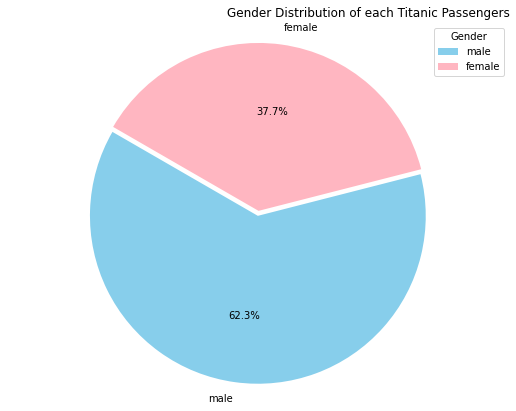

In [19]:
# Get gender counts
gender_counts = df['sex'].value_counts()

# Create pie chart
plt.figure(figsize=(9,7))
plt.pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    colors=['skyblue', 'lightpink'], 
    startangle=150, 
    explode=(0.03, 0)  # Slightly separate the first slice
)
plt.title('Gender Distribution of each Titanic Passengers',loc='right')
plt.legend(gender_counts.index, title='Gender', loc='best')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

## 3. How does survival rate differ by class?

In [20]:
df['survived'].unique() #To confirm the classes of survivals 

array([0, 1])

In [21]:
survival_by_class = df.groupby('pclass')['survived'].mean().round(3)
print(survival_by_class)

pclass
1    0.633
2    0.506
3    0.259
Name: survived, dtype: float64


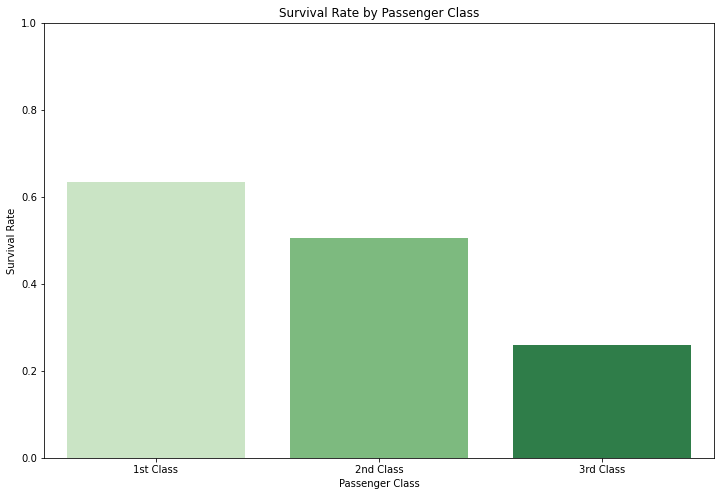

In [22]:
# Group and calculate survival rate
survival_by_class = df.groupby('pclass')['survived'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='pclass', y='survived', data=survival_by_class, palette='Greens')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])

plt.show()


## 4 What is the distribution of passenger ages?

In [23]:
df['age'].describe()

count    775.000000
mean      29.581187
std       13.766359
min        0.420000
25%       21.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64

In [24]:
df['age'].head(10).sort_values(ascending=False) #to confirm the highest age

6    54.0
1    38.0
3    35.0
4    35.0
5    28.0
8    27.0
2    26.0
0    22.0
9    14.0
7     2.0
Name: age, dtype: float64

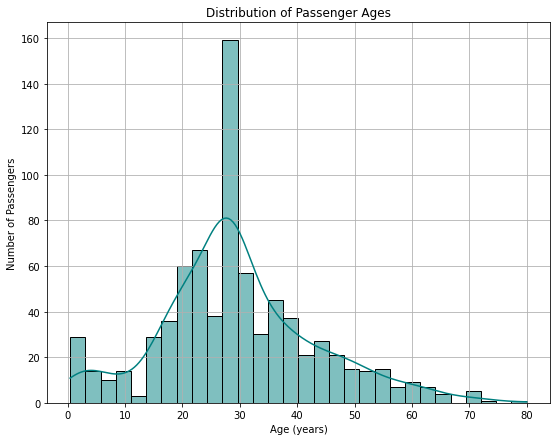

In [25]:
plt.figure(figsize=(9,7))
sns.histplot(df['age'], bins=30, kde=True, color='teal')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age (years)')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# 5. How many passengers embarked from each location?

In [26]:
df['embarked'].value_counts()

S    560
C    155
Q     58
       2
Name: embarked, dtype: int64

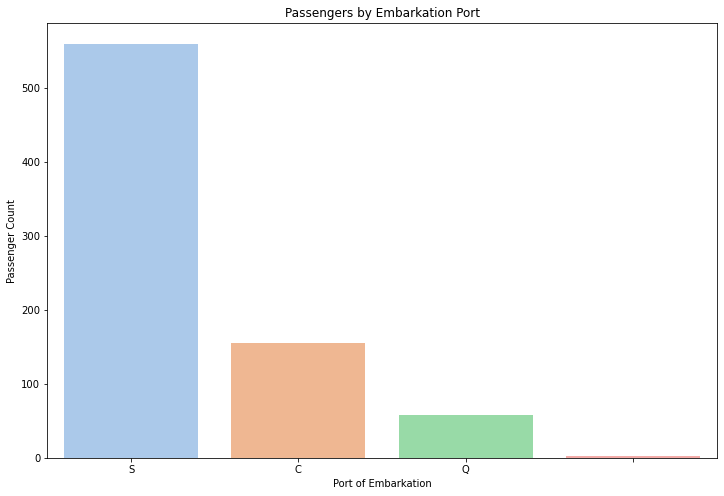

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='embarked', data=df, palette='pastel')
plt.title('Passengers by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Passenger Count')
plt.show()

# 6. What is the average fare paid per class?

In [28]:
average_fare_per_class = df.groupby('pclass')['fare'].mean().round(2)
print(average_fare_per_class)

#This means: Passengers in 1st class paid an average fare of $84.15 2nd class: about $20.66 3rd class: about $13.68

pclass
1    85.68
2    21.89
3    13.59
Name: fare, dtype: float64


# 7. How does gender affect survival rates?

In [29]:
gender_survival = df.groupby('sex')['survived'].mean().round(3)
print(gender_survival)

sex
female    0.740
male      0.215
Name: survived, dtype: float64


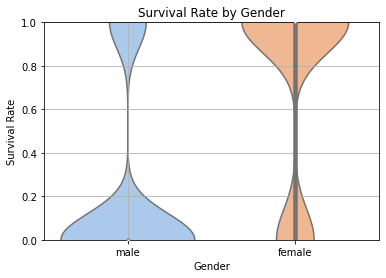

In [41]:
plt.figure(figsize=(6,4))
sns.violinplot(x='sex', y='survived', data=df, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# 8. What is the correlation between fare and survival?

In [31]:
correlation = df['fare'].corr(df['survived'])
print("Correlation between Fare and Survival:", round(correlation, 3))

Correlation between Fare and Survival: 0.247


# 9. How does the number of siblings/ spouses aboard affect survival?

In [32]:
sibsp_survival = df.groupby('sibsp')['survived'].mean().round(3)
print(sibsp_survival)

'''
Interpretation:

Passengers with 1 sibling/spouse had the highest survival rate.

Larger families (≥4 sibsp) had much lower survival rates.

Solo travelers (0 sibsp) had a moderate survival rate.

'''

sibsp
0    0.382
1    0.532
2    0.444
3    0.286
4    0.167
5    0.000
8    0.000
Name: survived, dtype: float64


'\nInterpretation:\n\nPassengers with 1 sibling/spouse had the highest survival rate.\n\nLarger families (≥4 sibsp) had much lower survival rates.\n\nSolo travelers (0 sibsp) had a moderate survival rate.\n\n'

# 10. What is the age distribution by class?

In [33]:
age_by_class = df.groupby('pclass')['age'].describe()
print(age_by_class)

        count       mean        std   min   25%   50%     75%   max
pclass                                                             
1       210.0  36.921048  14.198138  0.92  28.0  35.0  47.750  80.0
2       164.0  29.791646  14.203097  0.67  23.0  29.0  36.125  70.0
3       401.0  25.651297  11.635682  0.42  19.0  27.0  30.000  74.0


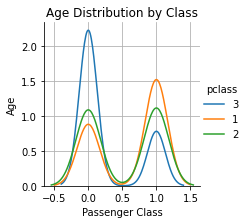

In [34]:
sns.FacetGrid(df,hue='pclass').map(sns.kdeplot, 'survived').add_legend()
plt.title('Age Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(True)
plt.show()

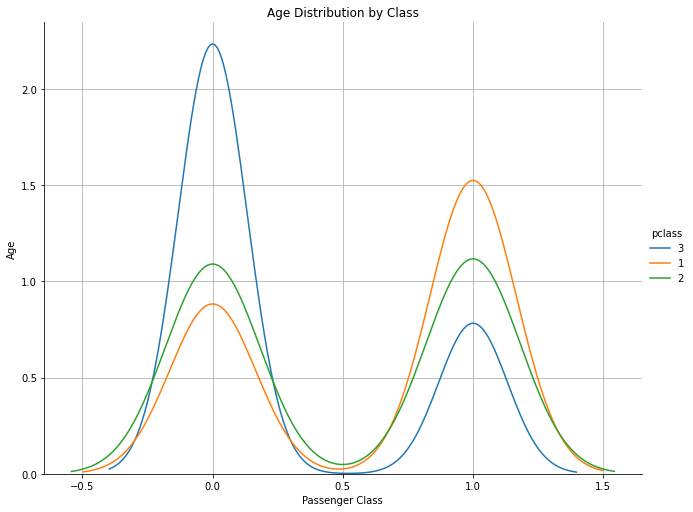

In [35]:
# i love this plot so much i want to make it bigger 😃

# Set up the FacetGrid with desired size
g = sns.FacetGrid(df, hue='pclass', height=7, aspect=1.3)

# Map the KDE plot
g.map(sns.kdeplot, 'survived').add_legend()

# Add labels and title
plt.title('Age Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# 11. What is the survival rate by embarkation point?

In [36]:
survival_by_embark = df.groupby('embarked')['survived'].mean().round(3)
print(survival_by_embark)

''' 
Passengers who boarded at Cherbourg (C) had the highest survival rate (55.4%)

Queenstown (Q): 39%

Southampton (S): 33.7%

'''

embarked
     1.000
C    0.581
Q    0.345
S    0.371
Name: survived, dtype: float64


' \nPassengers who boarded at Cherbourg (C) had the highest survival rate (55.4%)\n\nQueenstown (Q): 39%\n\nSouthampton (S): 33.7%\n\n'

## 12. What is the impact of having parents/ children aboard on survival?

In [37]:
parch_survival = df.groupby('parch')['survived'].mean().round(3)
print(parch_survival)

parch
0    0.373
1    0.553
2    0.533
3    0.600
4    0.000
5    0.200
6    0.000
Name: survived, dtype: float64


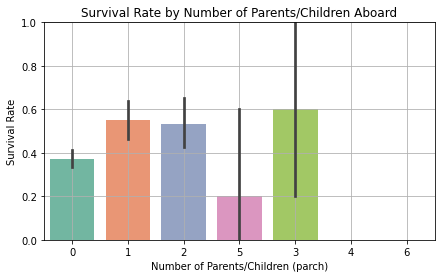

In [38]:
plt.figure(figsize=(7, 4))
sns.barplot(x='parch', y='survived', data=df, palette='Set2')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children (parch)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [39]:
''' Passengers with 1–3 parents/children aboard had higher survival rates than those with none.

Having 4 or more was associated with very low or no survival.

Solo travelers (parch = 0) had a survival rate of around 34%.'''

' Passengers with 1–3 parents/children aboard had higher survival rates than those with none.\n\nHaving 4 or more was associated with very low or no survival.\n\nSolo travelers (parch = 0) had a survival rate of around 34%.'

In [40]:
#Hope you enjoyed the Codes i am open for any critisism
#Yours Sincerly 
#Okodede Joseph